In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/data/airport-codes.csv')
df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [122]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

In [123]:
df['elevation_ft'].value_counts()

10.0       423
20.0       327
30.0       223
50.0       214
16.0       193
          ... 
5710.0       1
3793.0       1
3788.0       1
3134.0       1
12816.0      1
Name: elevation_ft, Length: 5538, dtype: int64

Since there's not much data it would be better to over sample it later in the preprocess stage

In [124]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
iso_country       246
iso_region          0
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
coordinates         0
dtype: int64

# Data Wrangling

In [125]:
df[['ISO_Country','ISO_state']] = df['iso_region'].str.split('-',n=1, expand=True)

Since we made a new column for iso_region, we can dop these columns

In [126]:
df.drop(['iso_country','iso_region'], axis= 1, inplace=True)

In [127]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,coordinates,ISO_Country,ISO_state
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",US,PA
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",US,KS
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",US,AK
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",US,AL
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",US,AR


we would have to do the same for coordination

In [128]:
def split_clean_coordinate(long,lang,co):
    df[[long,lang]] = df[co].str.split(',',n=1,expand=True)
    df.drop([co],axis=1,inplace=True)
    df[long] = df[long].astype(float)
    df[lang] = df[lang].astype(float)

In [129]:
split_clean_coordinate('Longitude','Latitude','coordinates')

Now that I changes Longitude and Latitude we can do further analysis by using correlation in the EDA section

In [130]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [131]:
duplicateRowsDF = df[df.duplicated()]
len(duplicateRowsDF)

0

In [132]:
df.rename(columns = {'ISO_Country': 'Country' ,'ISO_state':'State'}, inplace =True)

Since we already have coordinates and the state names, we dont need iata code which is the location identification code.

In [133]:
df.drop(['iata_code'], axis = 1, inplace=True)

In [134]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,local_code,Country,State,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.608700


In [135]:
df['ident'].value_counts()

00A        1
NO-0013    1
NTMP       1
NTMU       1
NTTB       1
          ..
EFRV       1
EFRY       1
EFSA       1
EFSE       1
ZZZZ       1
Name: ident, Length: 57421, dtype: int64

we can see that ident is a primary key column so we can drop that as well. 

In [136]:
df.drop(['ident'], axis = 1, inplace=True)

lets try to fill up NA values

Let's analyze why datas are missing. 
There are three types of missing data. 
1. Missing completely at random(MCAR)
2. Missing at Random(MAR)
3. Missing Not at Random(MNAR)

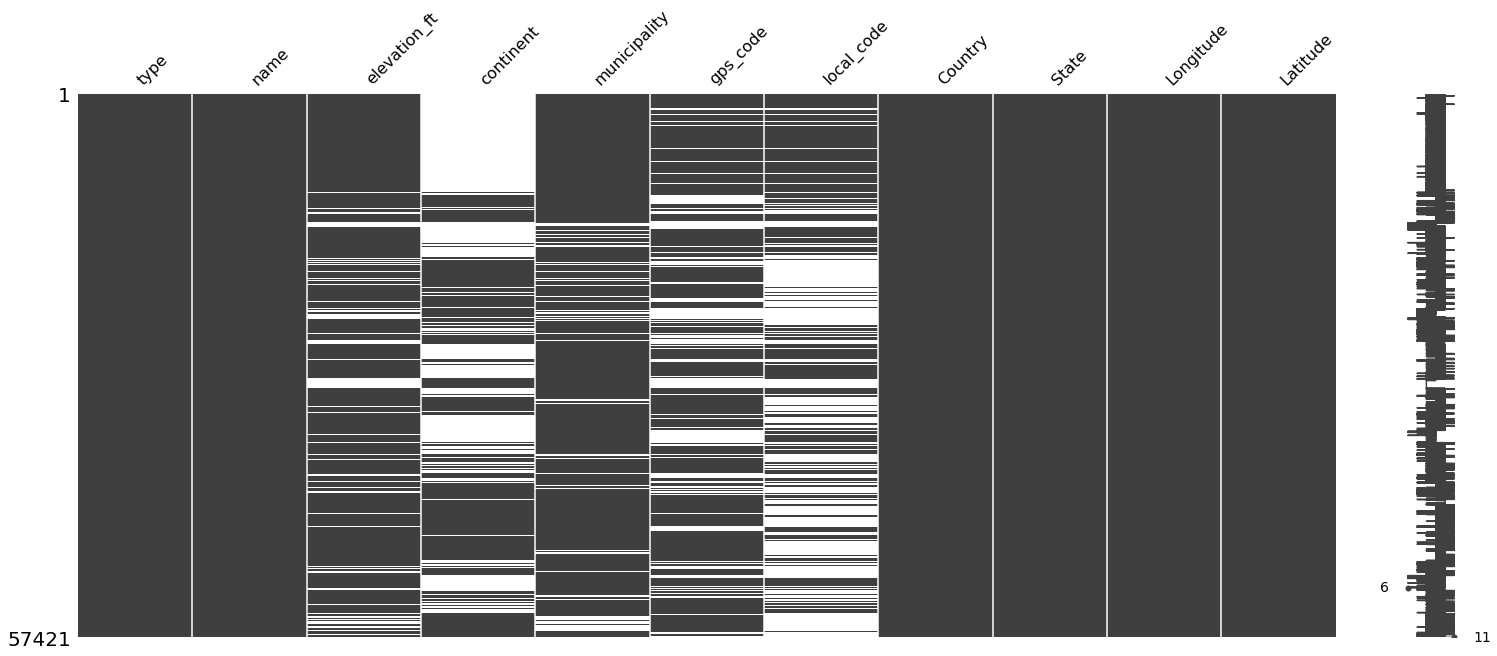

In [137]:
import missingno as msno
msno.matrix(df)
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/MSNO_matrix.jpeg',bbox_inches='tight') 

<AxesSubplot:>

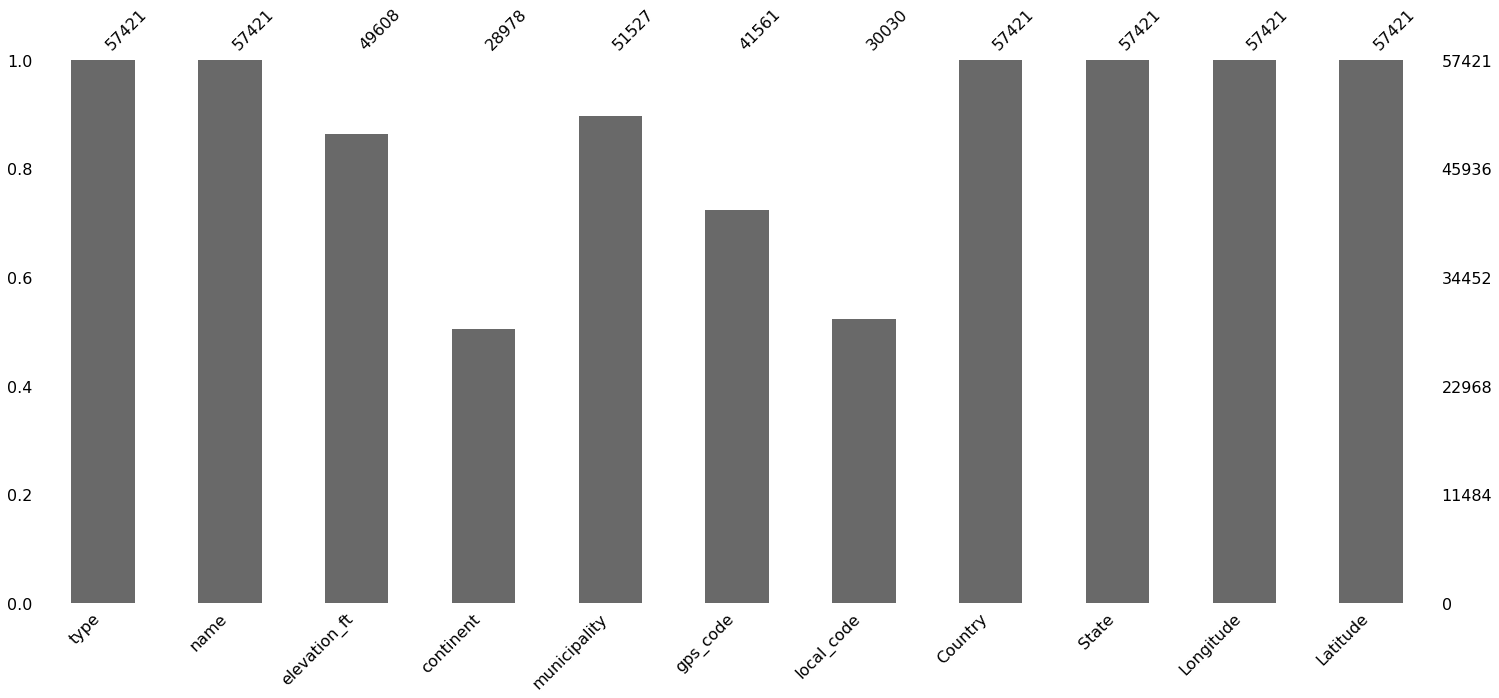

In [138]:
msno.bar(df)

It seems like the missing values for elevation_ft, continent, municipality, gps_code, local_code, definitely aren't missing with certain patterns. They are missing in random. Let's look at more about the elevation_ft column. 

elevation_ft is not missing by normal

Now I want to visualize how their elevation feets are like.

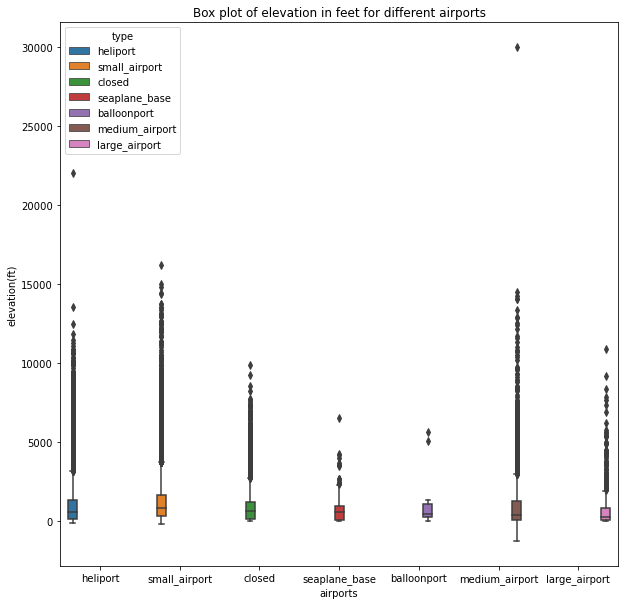

<Figure size 432x288 with 0 Axes>

In [139]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data =df, hue = 'type')
plt.xlabel('airports')
plt.ylabel('elevation(ft)')
plt.title('Box plot of elevation in feet for different airports')
plt.show()
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/boxplot.jpeg',bbox_inches='tight') 

In [140]:
df['type'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

Let's drop the value that has closed. Closed airports aren't useful for our future analysis.

In [141]:
df.drop(df[df['type'] == 'closed'].index, inplace = True)

In [142]:
data_input = ['heliport', 'small_airport', 'seaplane_base', 'medium_airport', 'large_airport']

In [143]:
def plot_mean_type(data, airport_types):
    mean_list = []
    for airport_type in airport_types:
        type_mean = np.mean(data[data['type'] == airport_type]['elevation_ft'])
        mean_list.append(type_mean)
    mean_df = pd.DataFrame({'mean_type_airport': mean_list}, index=data_input)
    return mean_df

In [144]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f

,mean_type_airport
heliport,1199.377100
small_airport,1349.811397
seaplane_base,649.716329
medium_airport,1059.199724
large_airport,798.062295


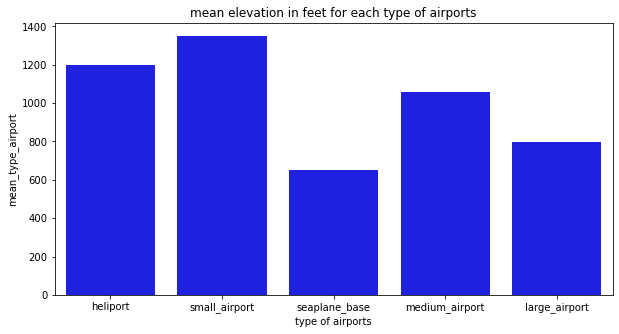

<Figure size 432x288 with 0 Axes>

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(x = mean_df_f.index, y = mean_df_f.mean_type_airport, data= mean_df_f, color ='b')
plt.title('mean elevation in feet for each type of airports')
plt.xlabel('type of airports')
plt.show()
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/mean_elevation_ft_airports') 

We can see the small airport has the most highest mean value for elevation in feet. 

The large airport and seaplane base has the smallest mean value. In further analysis, we will figure out the correlation and the deep feature analysis.

We can also identify that there are not many medium_airport, seaplane_base, large_airport, and balloonport. We can add the airports by it's similar elevation feet. We can concatenate baloonport - medium airport and seaplane-base and large airport

<AxesSubplot:xlabel='type'>

<Figure size 720x720 with 0 Axes>

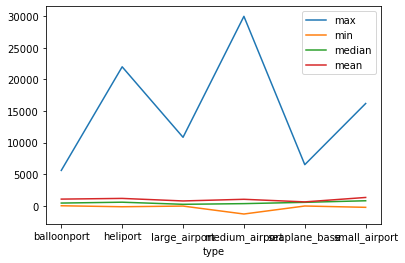

In [146]:
plt.figure(figsize=(10,10))
pd.DataFrame({'max':df.groupby(['type'])['elevation_ft'].max(), 
             'min':df.groupby(['type'])['elevation_ft'].min(),
            'median':df.groupby(['type'])['elevation_ft'].median(),
             'mean':df.groupby(['type'])['elevation_ft'].mean()}).plot()

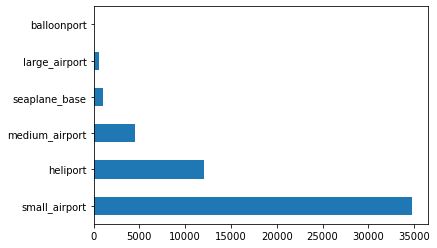

In [153]:
df.type.value_counts().plot(kind='barh')
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/count_type_airports.jpeg')

In [67]:
df.loc[(df['type'] == 'large_airport'), 'type'] = 'seaplane_base'

In [68]:
df.loc[(df['type'] == 'balloonport'), 'type'] = 'medium_airport'

In [69]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4561
seaplane_base      1646
Name: type, dtype: int64

In [70]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f = mean_df_f.reset_index()
mean_df_f

,index,mean_type_airport
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,712.167012
3,medium_airport,1059.329587
4,large_airport,NaN


In [71]:
mean_df_f.columns = ['airport','mean_']
mean_df_f

,airport,mean_
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,712.167012
3,medium_airport,1059.329587
4,large_airport,NaN


In [72]:
df['elevation_ft'] = df['elevation_ft'].fillna(111)

def filling_na(type_airport, val):
    b = df['type']==type_airport
    df.loc[b,'elevation_ft'] = df.loc[b,'elevation_ft'].replace(111,val)

In [73]:
def fill_all_type(data):
    for i in range(len(data)):
        filling_na(data.airport[i], data.mean_[i])

In [74]:
fill_all_type(mean_df_f)

We fill up all the NA values with 111 first. Then we replace 111 with with the mean values for each type of airports.

We can see that the elevation feet has no more null values. Let's continue to explore more for others

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

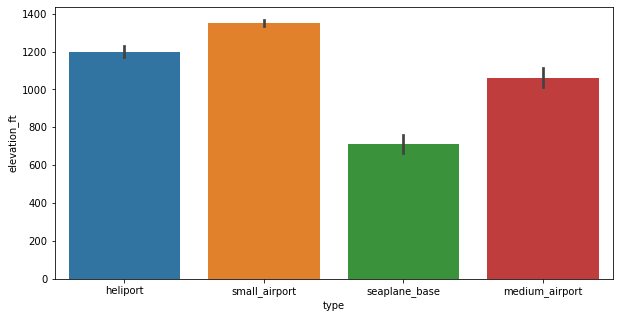

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data = df)

We see that small_airport has the highest elevation feet and balloonport has a huge range of confidence interval. Small_airport might have a bigger range than other airports because of it's outliers. Therefore, it's better to visualize with other types of graphs instead of a boxplot. 

But first, let's focus on filling up Na values first.

In [76]:
df['continent'].value_counts()

SA    8212
EU    7404
AS    5363
AF    3283
OC    3008
AN      26
Name: continent, dtype: int64

gps_cood and loca_code aren't really useful. We can drop these columns.

If I label encode thse in the future, there owuld be too many columns

In [77]:
df.drop(['gps_code','local_code'], axis= 1, inplace =True)

In [78]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NaN,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NaN,Alex,US,OK,-97.818019,34.942803


So all the US has missing values with NaN.

In [79]:
df['continent'].fillna('A',inplace=True)

In [80]:
def fill_continent(country, continent):
    country_data = df['Country'] == country
    df.loc[country_data,'continent'] = df.loc[country_data,'continent'].replace('A', continent)

I filled up NAs with A (temporarily)

And filled up all the country matching their appropriate continent. 

In [81]:
fill_continent('US', 'NA')
fill_continent('CA', 'NA')
fill_continent('MX', 'NA')
fill_continent('CU', 'NA')
fill_continent('CR', 'NA')
fill_continent('GL', 'NA')
fill_continent('HN', 'CA')

In [82]:
df['continent'].value_counts()

NA    25148
SA     8212
EU     7404
AS     5363
AF     3283
OC     3008
A       446
CA      153
AN       26
Name: continent, dtype: int64

We changed all the A to NA - North America.

And other countries and continents as well

While I'm filling up the data I found that there's a country labeled as PA which I would have to drop this since it is a data error.

There are other countries that can be labeled into certain continents but since there's not even 100 data for each of the countries, I will drop all of them.

In [83]:
df[df['continent'] == 'A']['Country'].value_counts()

PA    69
BS    61
PR    56
GT    52
DO    34
NI    32
SV    25
BZ    24
JM    19
VI     9
HT     8
TC     8
GP     6
VC     5
VG     4
TT     3
KY     3
AG     3
BQ     3
KN     2
LC     2
DM     2
GD     2
BB     2
MF     2
PM     2
BL     1
AW     1
MQ     1
CW     1
SX     1
AI     1
MS     1
BM     1
Name: Country, dtype: int64

In [84]:
df_2 = df[df.continent != 'A']
df_2.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


In [85]:
#Also, for the State column, there are some Statesthat has '-' and other special characters.
#We have to get rid of this

import re
df['State'] = df['State'].apply(lambda x: re.sub('-', '', x))

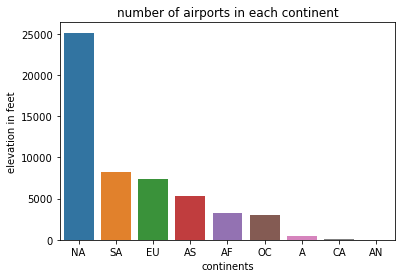

<Figure size 432x288 with 0 Axes>

In [86]:
sns.barplot(x = df.continent.value_counts().index, y = df.continent.value_counts().values, data=df)
plt.title('number of airports in each continent')
plt.xlabel('continents')
plt.ylabel('elevation in feet')
plt.show()
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/number_airports_in_continent.jpeg',bbox_inches='tight') 

We have so much values for NA's. I guess most of the airports are densed in North America.

Let's see what kind of airport are common in North America.

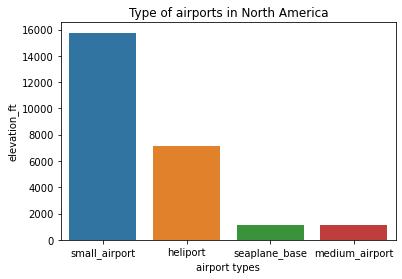

In [87]:
sns.barplot(x = df[df.continent == 'NA']['type'].value_counts().index, y = df[df.continent == 'NA']['type'].value_counts().values, data = df[df.continent == 'NA'])
plt.ylabel('elevation_ft')
plt.xlabel('airport types')
plt.title('Type of airports in North America')
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/Number_airports_in_NA.jpeg',bbox_inches='tight') 

line plot shows the relationship between elevation_ft for each type of airports. But oddly, it has a different result when I plot it with the catplot underneath.

<Figure size 1080x288 with 0 Axes>

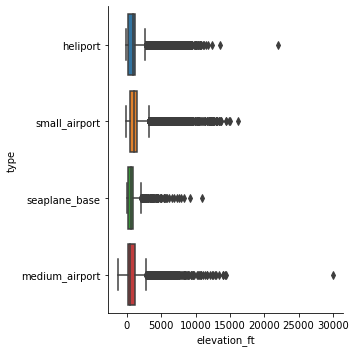

In [88]:
plt.figure(figsize=(15,4))
sns.catplot(data=df, x="elevation_ft", y="type", kind="box")

I can see outliers in this horizontal boxplot. Let's see more.

In [89]:
df[df['elevation_ft'] > 25000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
55049,medium_airport,Modi,29977.0,NA,California,US,CA,179.999894,89.999845


The elevation_ft 29977.0 is an outlier because according to google, 
The Leadville Airport is North America's highest public use airport at an altitude of 9,934 feet.

Hence, we don't drop this row.

I can not find anything about the elevation feet for modi airport. So I will drop this.

In [90]:
df.drop([55049], axis=0, inplace=True)

In [91]:
df[df['elevation_ft'] > 20000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
25164,heliport,Siachen Glacier AFS Airport,22000.0,AS,NaN,IN,JK,77.0,35.5


This isn't an outlier. It's a fact

In [92]:
df[df.type == 'heliport'].describe().elevation_ft

count    12028.000000
mean      1199.739048
std       1574.350775
min       -117.000000
25%        200.000000
50%        808.000000
75%       1199.377100
max      22000.000000
Name: elevation_ft, dtype: float64

In [93]:
pd.DataFrame({'max':df.groupby(['type'])['elevation_ft'].max(), 
             'min':df.groupby(['type'])['elevation_ft'].min(),
            'median':df.groupby(['type'])['elevation_ft'].median(),
             'mean':df.groupby(['type'])['elevation_ft'].mean()})

,max,min,median,mean
type,,,,
heliport,22000.0,-117.0,808.0,1199.739048
medium_airport,14472.0,-1266.0,433.0,1054.027828
seaplane_base,10860.0,-11.0,580.5,712.532241
small_airport,16200.0,-210.0,978.0,1350.131706


In [94]:
def describe(data, col):
    max_v = data[col].max()
    min_v = data[col].min()
    median_v = data[col].median()
    mean_v = data[col].mean()
    return "Max: {}".format(max_v), "Min: {}".format(min_v), "Median: {}".format(median_v), "Mean: {}".format(mean_v)
    

In [95]:
describe(df,'elevation_ft')

('Max: 22000.0', 'Min: -1266.0', 'Median: 879.0', 'Mean: 1270.7861817171681')

In [96]:
below_avg = []
above_avg = []
for val in df['elevation_ft']:
    if val > 1231:
        above_avg.append(val)
    else:
        below_avg.append(val)

In [97]:
print(len(below_avg))
len(above_avg)

34376


18666

Seems like people build airports in lower elevated place than higher. Why is this?

In [98]:
df['Longitude'].astype(str).astype(float)
df['Latitude'].astype(str).astype(float)

0        40.070801
1        38.704022
2        59.949200
3        34.864799
5        34.942803
           ...    
57416    40.542524
57417    41.784401
57418    51.894444
57419   -11.584278
57420    30.784722
Name: Latitude, Length: 53042, dtype: float64

In [99]:
df.isnull().sum()

type               0
name               0
elevation_ft       0
continent          0
municipality    5237
Country            0
State              0
Longitude          0
Latitude           0
dtype: int64

Not an outlier

In [100]:
df[df['municipality'].isnull()]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
1550,heliport,Watertown / Brownlee Heliport,1720.000000,NA,NaN,US,SD,-97.108090,44.883265
2459,heliport,Nordman / Phillabaum Heliport,2440.000000,NA,NaN,US,ID,-116.871175,48.631483
4417,seaplane_base,Peru / Destiny Cove SPB,580.000000,NA,NaN,US,ME,-70.396957,44.460597
7690,small_airport,Zadow Airstrip,1349.811397,NA,NaN,US,TX,-95.954354,29.991739
7926,small_airport,Gun Barrel City Airpark,385.000000,NA,NaN,US,TX,-96.145665,32.355150
...,...,...,...,...,...,...,...,...,...
57358,small_airport,Sengwa Research Area Airstrip,1349.811397,AF,NaN,ZW,MN,28.215618,-18.165196
57359,small_airport,Gokwe North Airport,1349.811397,AF,NaN,ZW,MI,28.330871,-17.537114
57362,small_airport,Chipinge Farm Airstrip,1349.811397,AF,NaN,ZW,MV,32.203607,-20.460575
57363,small_airport,Turwi River Airstrip,1349.811397,AF,NaN,ZW,MV,32.109040,-20.395009


In [101]:
ar_1 = df['municipality'].value_counts().values

In [102]:
z=0
for i in ar_1:
    if i == 1:
        z+= 1
z       

19741

19741 unique values are identified.

In [103]:
df.drop(['name','municipality'], axis=1, inplace = True)

There are too many unqiue values for municipality column.

In [104]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


In [105]:
df.groupby('type')['elevation_ft'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
heliport,12028.0,1199.739048,1574.350775,-117.0,200.00,808.0,1199.3771,22000.0
medium_airport,4560.0,1054.027828,1638.099686,-1266.0,85.75,433.0,1171.0000,14472.0
seaplane_base,1646.0,712.532241,965.975517,-11.0,87.25,580.5,870.7500,10860.0
small_airport,34808.0,1350.131706,1501.021729,-210.0,367.00,978.0,1478.0000,16200.0


seaplane_base and large_airport has lower elevation level

In [106]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


It seems like we got a clean data now. Let's check the outliers for elevation_ft one more time and see if we can go on to the next step

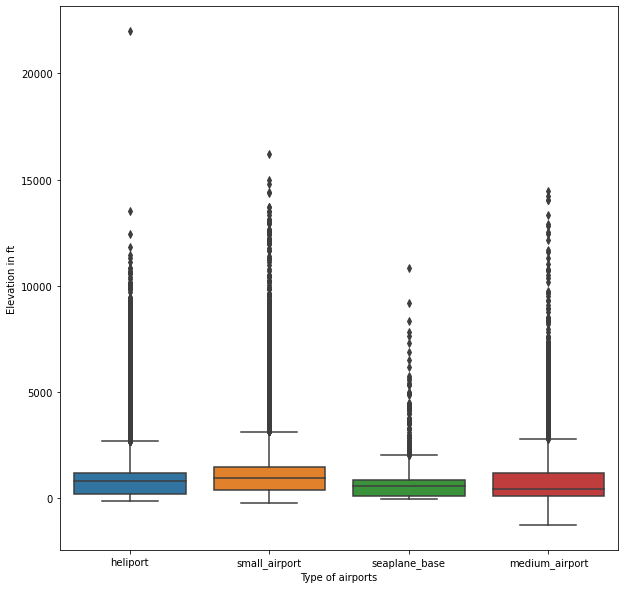

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data=df)
plt.xlabel('Type of airports')
plt.ylabel('Elevation in ft')
plt.show()

There are still few outliers but I identified them as true values. Not fraud

Now lets go back to the state column. We can identify numeric values for the state column and I will remove these columns. 

In [108]:
index_digit = df[df['State'].apply(lambda x: x.isdigit())].index
index_digit

Int64Index([10426, 10427, 10431, 10456, 10459, 10476, 10516, 10738, 10740,
            11561,
            ...
            57409, 57410, 57411, 57412, 57413, 57414, 57415, 57416, 57417,
            57420],
           dtype='int64', length=6167)

In [109]:
df.drop(index_digit, inplace = True)

In [110]:
df['type'].unique()

array(['heliport', 'small_airport', 'seaplane_base', 'medium_airport'],
      dtype=object)

The last thing is to balance out all the variables for the training set later

In [111]:
new_df_country = df.Country.value_counts().to_frame()
new_df_country.Country.unique()

array([21322,  4863,  2136,  1988,  1351,   983,   938,   889,   830,
         829,   702,   591,   530,   476,   474,   468,   423,   317,
         287,   274,   261,   242,   207,   198,   193,   175,   173,
         153,   137,   128,   121,   120,   114,   112,   108,   106,
         101,    96,    94,    85,    84,    81,    80,    75,    70,
          65,    61,    60,    59,    58,    56,    55,    54,    52,
          51,    48,    44,    42,    41,    39,    37,    36,    35,
          34,    33,    32,    30,    29,    27,    26,    25,    24,
          22,    21,    20,    17,    16,    13,    12,    11,    10,
           9,     8,     7,     6,     5,     4,     3,     2,     1])

Some of the countries have such less values so we can not use these valeus to train the classification models.

We have coordinates which are divided as longitude and latitude. We also confirmed that Longitude and Latitude are only slightly negtiavely correlated. So it would be better to drop the Country for lack of information. And we dont have to drop either the Longitutude or Latitude column because of multicollinearity. Dropping the Country columns would be fine to give enough information to the customer since we have the coordinates and the continent. So Let's go ahead and drop the country column. 

In [112]:
df.drop(['Country'], axis =1, inplace = True)

In [113]:
df.drop(['State'], axis = 1, inplace = True)

The data is clean enough with good object types to go to the next step which is EDA. 

Save the data frames into a csv file.

In [114]:
# df.to_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/df.csv')


In [115]:
# mean_df_f.to_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/mean_df.csv')

In [116]:
df.head()

,type,elevation_ft,continent,Longitude,Latitude
0,heliport,11.0,NA,-74.933601,40.070801
1,small_airport,3435.0,NA,-101.473911,38.704022
2,small_airport,450.0,NA,-151.695999,59.949200
3,small_airport,820.0,NA,-86.770302,34.864799
5,small_airport,1100.0,NA,-97.818019,34.942803
